In [1]:
%run ./get_fixed_variables.ipynb

In [2]:
def get_variable_globavg_MOC(root, variable):
    file_list = sorted(np.array([file for file in pathlib.Path(root).rglob('*h.' + variable + '*')]))
    print(file_list)
    length = np.zeros(len(file_list))
    i = 0
    for file in file_list:
        data = nc.Dataset(file)
        var = np.array(data[variable])
        length[i] = int(len(var))/12
        i+=1
    print(length)
    output_list = np.zeros([int(sum(length))])    
    j = 1
    atlantic = 1
    for file in file_list:
        data = nc.Dataset(file)
        z = data.variables['moc_z'][:]
        lat = data.variables['lat_aux_grid'][:]
        print('about to read data')
        sys.stdout.flush()
        MOC = data.variables['MOC'][:,atlantic,:,:,:]
        lat_lims = [0,50] #lat range to pick maximum from 
        lat_range = lat[np.where((lat<lat_lims[1]) & (lat>lat_lims[0]))]

        eulerian = 0
        moc_3D = MOC[:,eulerian,:,:] #use only eulerian component (?)
        moc_3D = moc_3D[:,:,np.where((lat<lat_lims[1]) & (lat>lat_lims[0]))]
        moc_3D = np.squeeze(moc_3D)

        moc_1D = np.zeros(moc_3D.shape[0],)
        depth_below = 24 #index of depth I want to look below (to exlude gyre)
        for month in range(len(moc_1D)):
            moc_1D[month] = np.amax(moc_3D[month,depth_below:,:])

        years = int(len(moc_1D)/12)
        moc_yearly = np.zeros(years,)

        for year in range(years):
            moc_yearly[year] = np.nanmean(moc_1D[year*12:(year+1)*12])  
        output_list[int(sum(length[:j-1])):int(sum(length[:j]))] = moc_yearly
        j += 1
    return(output_list)

In [3]:
x8co2_strato_root_ocn = '/glade/campaign/univ/uhar0013/asalazar/8xco2_strato/ocn/'
x8co2_nostrato_root_ocn = '/glade/campaign/univ/uhar0013/asalazar/8xco2_nostrato/ocn/'

x1co2_strato_root_ocn = '/glade/campaign/univ/uhar0013/asalazar/PI_strato/b.e21.B1850.f19_g17.PI_stratolocked.001/ocn/'
x1co2_nostrato_root_ocn = '/glade/campaign/univ/uhar0013/asalazar/PI_nostrato/ocn/'


x8co2_control_root_ocn = '/glade/campaign/univ/uhar0013/asalazar/8xco2_spinup/ocn/'

x1co2_control_root_ocn = '/glade/campaign/cgd/ppc/jiangzhu/PaleoCalibr/b.e21.B1850.f19_g17.PaleoCalibr.PI.02/ocn/proc/tseries/month_1'


MOC_8xco2_strato = get_variable_globavg_MOC(x8co2_strato_root_ocn, 'MOC')
MOC_8xco2_nostrato = get_variable_globavg_MOC(x8co2_nostrato_root_ocn, 'MOC')

MOC_1xco2_strato = get_variable_globavg_MOC(x1co2_strato_root_ocn, 'MOC')
MOC_1xco2_nostrato = get_variable_globavg_MOC(x1co2_nostrato_root_ocn, 'MOC')

MOC_1xco2_control = get_variable_globavg_MOC(x1co2_control_root_ocn, 'MOC')
MOC_8xco2_control = get_variable_globavg_MOC(x8co2_control_root_ocn, 'MOC')

[PosixPath('/glade/campaign/univ/uhar0013/asalazar/8xco2_strato/ocn/b.e21.B1850.f19_g17.8xCO2_stratolocked_PaleoCalibr.001.pop.h.MOC.0001-0200.nc'), PosixPath('/glade/campaign/univ/uhar0013/asalazar/8xco2_strato/ocn/b.e21.B1850.f19_g17.8xCO2_stratolocked_PaleoCalibr.002.pop.h.MOC.0201-0400.nc')]
[200. 200.]
about to read data
about to read data
[PosixPath('/glade/campaign/univ/uhar0013/asalazar/8xco2_nostrato/ocn/b.e21.B1850.f19_g17.8xCO2_nostrato_PaleoCalibr.001.pop.h.MOC.0001-0200.nc'), PosixPath('/glade/campaign/univ/uhar0013/asalazar/8xco2_nostrato/ocn/b.e21.B1850.f19_g17.8xCO2_nostrato_PaleoCalibr.002.pop.h.MOC.0201-0400.nc')]
[200. 200.]
about to read data
about to read data
[PosixPath('/glade/campaign/univ/uhar0013/asalazar/PI_strato/b.e21.B1850.f19_g17.PI_stratolocked.001/ocn/b.e21.B1850.f19_g17.PI_stratolocked.001.pop.h.MOC.0001-0110.nc'), PosixPath('/glade/campaign/univ/uhar0013/asalazar/PI_strato/b.e21.B1850.f19_g17.PI_stratolocked.001/ocn/b.e21.B1850.f19_g17.PI_stratolocked

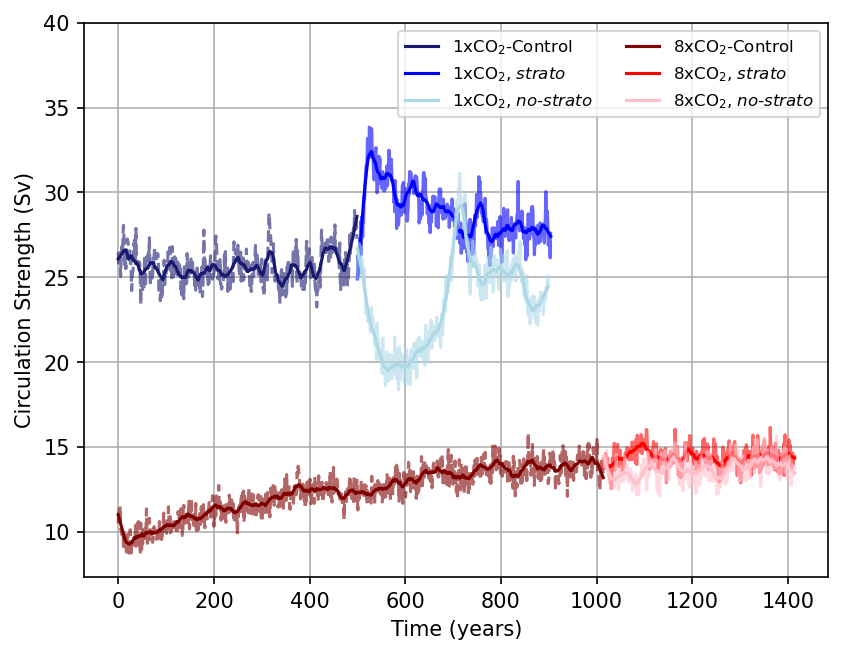

In [4]:
plt.figure(dpi=150)
alpha= 0.6
time = np.arange(0, len(MOC_1xco2_control))

plt.plot(time, np.array(MOC_1xco2_control), color='midnightblue', linestyle='--', alpha = alpha)
plt.plot(time, savgol_filter(MOC_1xco2_control, 20, 1),color='midnightblue', label = '1xCO$_2$-Control')

time = np.arange(len(MOC_1xco2_control), len(MOC_1xco2_control)+len(MOC_1xco2_strato))

plt.plot(time, np.array(MOC_1xco2_strato), 'b-', alpha = alpha)
plt.plot(time, savgol_filter(MOC_1xco2_strato, 20, 1),'b', label = '1xCO$_2$, $\\it{strato}$')

time = np.arange(len(MOC_1xco2_control), len(MOC_1xco2_control)+len(MOC_1xco2_nostrato))

plt.plot(time, np.array(MOC_1xco2_nostrato), color='lightblue', alpha = alpha)
plt.plot(time, savgol_filter(MOC_1xco2_nostrato, 20, 1),color='lightblue',linestyle='-', label = '1xCO$_2$, $\\it{no}$-$\\it{strato}$')

time = np.arange(0, len(MOC_8xco2_control))

plt.plot(time, np.array(MOC_8xco2_control), color='maroon', linestyle='--', alpha = alpha)
plt.plot(time, savgol_filter(MOC_8xco2_control, 20, 1),color='maroon', label = '8xCO$_2$-Control')

time_strato = np.arange(len(MOC_8xco2_control), len(MOC_8xco2_control)+len(MOC_8xco2_strato))

plt.plot(time_strato, np.array(MOC_8xco2_strato), color = 'r', linestyle='-', alpha = alpha)
plt.plot(time_strato, savgol_filter(MOC_8xco2_strato, 20, 1),color = 'r', linestyle='-', label = '8xCO$_2$, $\\it{strato}$')

time_nostrato = np.arange(len(MOC_8xco2_control), len(MOC_8xco2_control)+len(MOC_8xco2_nostrato))

plt.plot(time_nostrato, np.array(MOC_8xco2_nostrato), color = 'pink', linestyle='-', alpha = alpha)
plt.plot(time_nostrato, savgol_filter(MOC_8xco2_nostrato, 20, 1),color = 'pink', linestyle='-', label = '8xCO$_2$, $\\it{no}$-$\\it{strato}$')



plt.legend(ncol=2, fontsize=8)
plt.yticks([10,15,20,25,30,35, 40])
plt.grid()
plt.ylabel('Circulation Strength (Sv)') 
plt.xlabel('Time (years)')
plt.savefig('./Figure_PDFs/Figure_S7.pdf', bbox_inches = 'tight', dpi=300)
